In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal, fft
import math as math
import os
from signalAnalysis import get_LE,get_psd,get_SNR,get_SMR

# make font bigger
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [2]:
fs = 1926. # change this to whatever sampling frequency you used

##  Find files

In [3]:
# change path name to wherever you saved your data
path = 'C:/Users/yamag/Documents/Work/Research/sensorfusion/analysis/EMG signal quality analysis/delsys-data'

files = os.listdir(path)    
files = list(filter(lambda f: f.endswith('.csv'), files))

## Compute average RMS, SNR, SMR for each trial

In [4]:
SNR = []
SMR = []
avg_LE = []

for file in files:
    # import data
    data = pd.read_csv(os.path.join(path,file),
                       names=["Time", "Biceps (V)", "Triceps (V)"])
    f,Pxx_bic,Pxx_tri = get_psd(data,fs)
    SNR.append(get_SNR(f,Pxx_bic,Pxx_tri))
    SMR.append(get_SMR(f,Pxx_bic,Pxx_tri))
    avg_LE.append(get_LE(data,fs))

In [5]:
SNR = np.asarray(SNR)
SMR = np.asarray(SMR)
avg_LE = np.asarray(avg_LE)

## Make some plots

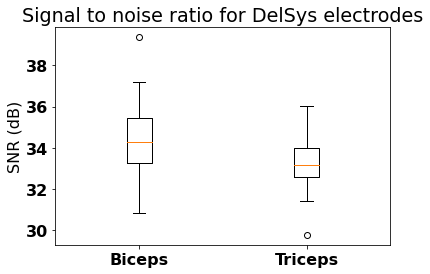

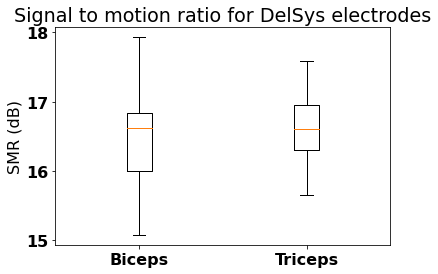

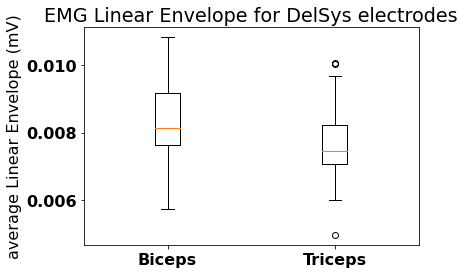

In [8]:
# PLOT SNR

plt.boxplot(SNR)
plt.xticks([1, 2], ["Biceps","Triceps"])
plt.ylabel("SNR (dB)")
plt.title("Signal to noise ratio for DelSys electrodes")
plt.show()

# PLOT SMR
plt.boxplot(SMR)
plt.ylabel("SMR (dB)")
plt.xticks([1, 2], ["Biceps","Triceps"])
plt.title("Signal to motion ratio for DelSys electrodes")
plt.show()

# PLOT AVG_RMS
plt.boxplot(avg_LE*1000)
plt.ylabel("average Linear Envelope (mV)")
plt.xticks([1, 2], ["Biceps","Triceps"])
plt.title("EMG Linear Envelope for DelSys electrodes")
plt.show()